# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(json.dumps(city_weather, indent=4, sort_keys=True))
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | kijang
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | iaciara
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | vadso
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | utrik
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | san isidro
Processing Record 16 of Set 1 | praia da vitoria
Processing Record 17 of Set 1 | zmeyskaya
Processing Record 18 of Set 1 | caucasia
Processing Record 19 of Set 1 | viedma
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of 

Processing Record 42 of Set 4 | zouerate
Processing Record 43 of Set 4 | beloyarskiy
Processing Record 44 of Set 4 | leava
Processing Record 45 of Set 4 | tandil
Processing Record 46 of Set 4 | fisterra
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 49 of Set 4 | quelimane
Processing Record 0 of Set 5 | byron bay
Processing Record 1 of Set 5 | bari
Processing Record 2 of Set 5 | tindouf
Processing Record 3 of Set 5 | altai
Processing Record 4 of Set 5 | merizo village
Processing Record 5 of Set 5 | progreso
Processing Record 6 of Set 5 | taltal
Processing Record 7 of Set 5 | callao
Processing Record 8 of Set 5 | kolonia town
Processing Record 9 of Set 5 | sitka
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | aristobulo del valle
Processing Record 12 of Set 5 | dakhla
Processing Record 13 of Set 5 | bredasdorp
Processing Record 14 of Set 5 | katsuren-haebaru
Processing Record 15 of

Processing Record 28 of Set 8 | santa terezinha
Processing Record 29 of Set 8 | novodvinsk
Processing Record 30 of Set 8 | nova sintra
Processing Record 31 of Set 8 | berdigestyakh
Processing Record 32 of Set 8 | fougamou
Processing Record 33 of Set 8 | bikenibeu village
Processing Record 34 of Set 8 | pudozh
Processing Record 35 of Set 8 | ust'-kut
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | floresti
Processing Record 38 of Set 8 | la mira
Processing Record 39 of Set 8 | cimislia
Processing Record 40 of Set 8 | san luis de la loma
Processing Record 41 of Set 8 | quetta
Processing Record 42 of Set 8 | novo horizonte
Processing Record 43 of Set 8 | peace river
Processing Record 44 of Set 8 | la passe
Processing Record 45 of Set 8 | okoneshnikovo
Processing Record 46 of Set 8 | opole lubelskie
Processing Record 47 of Set 8 | vyksa
Processing Record 48 of Set 8 | kemin
Processing Record 49 of Set 8 | pangody
Processing Record 0 of Set 9 | miranda do douro
Process

Processing Record 17 of Set 12 | kirensk
Processing Record 18 of Set 12 | alaghsas
Processing Record 19 of Set 12 | mamou
Processing Record 20 of Set 12 | al artawiyah
Processing Record 21 of Set 12 | bandar-e lengeh
Processing Record 22 of Set 12 | christchurch
Processing Record 23 of Set 12 | east end
Processing Record 24 of Set 12 | togur
Processing Record 25 of Set 12 | holualoa
Processing Record 26 of Set 12 | al azraq ash shamali
City not found. Skipping...
Processing Record 27 of Set 12 | onega
Processing Record 28 of Set 12 | igarape miri
Processing Record 29 of Set 12 | mount pleasant
Processing Record 30 of Set 12 | timimoun
Processing Record 31 of Set 12 | bukama
Processing Record 32 of Set 12 | maceio
Processing Record 33 of Set 12 | westport
Processing Record 34 of Set 12 | muisne
Processing Record 35 of Set 12 | livingston
Processing Record 36 of Set 12 | okhotsk
-----------------------------
Data Retrieval Complete
-----------------------------


In [73]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()



City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [74]:
# Display sample data
city_data_df.head()




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,25.57,84,100,5.66,US,1701128333
1,grytviken,-54.2811,-36.5092,-0.08,96,100,10.11,GS,1701128777
2,bethel,41.3712,-73.4140,7.17,60,100,3.09,US,1701128348
3,kijang,35.2442,129.2139,6.85,55,31,4.98,KR,1701128777
4,ribeira grande,38.5167,-28.7000,17.10,94,86,2.24,PT,1701128336


In [75]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,25.57,84,100,5.66,US,1701128333
1,grytviken,-54.2811,-36.5092,-0.08,96,100,10.11,GS,1701128777
2,bethel,41.3712,-73.4140,7.17,60,100,3.09,US,1701128348
3,kijang,35.2442,129.2139,6.85,55,31,4.98,KR,1701128777
4,ribeira grande,38.5167,-28.7000,17.10,94,86,2.24,PT,1701128336


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

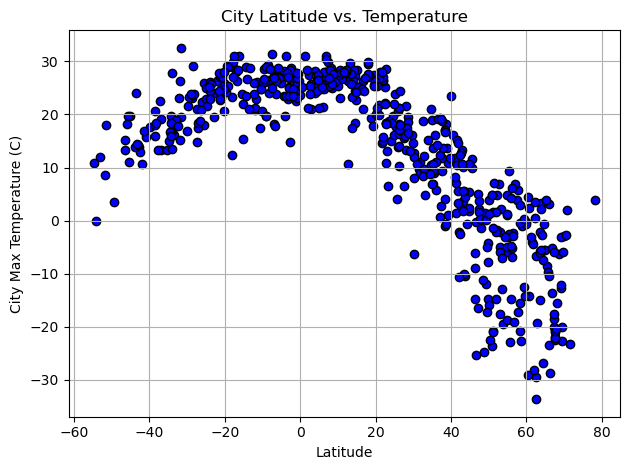

In [77]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("City Max Temperature (C)")
plt.title("City Latitude vs. Temperature")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

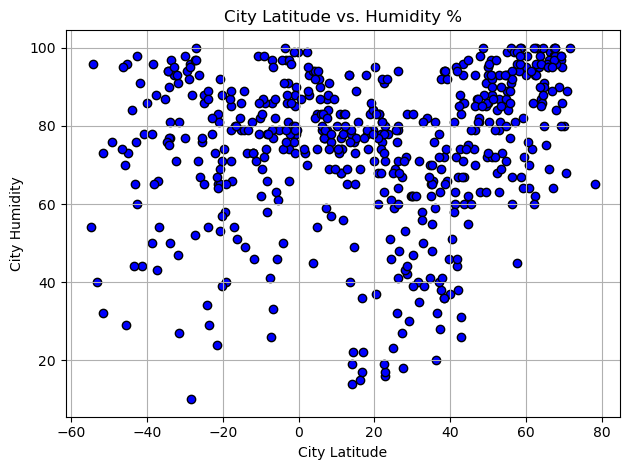

In [78]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],  marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Humidity")
plt.title("City Latitude vs. Humidity %")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

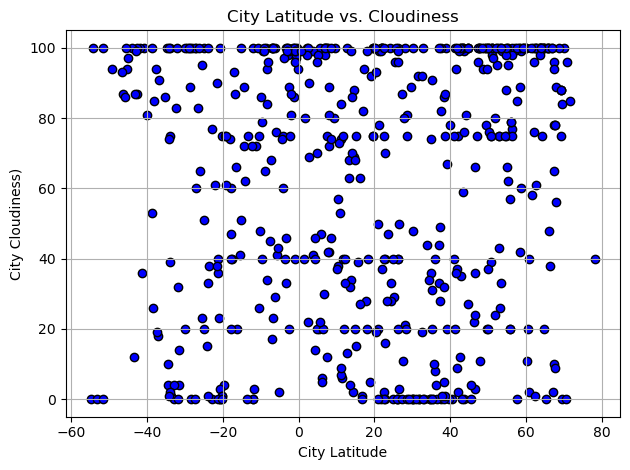

In [79]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("City Latitude")
plt.ylabel("City Cloudiness)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

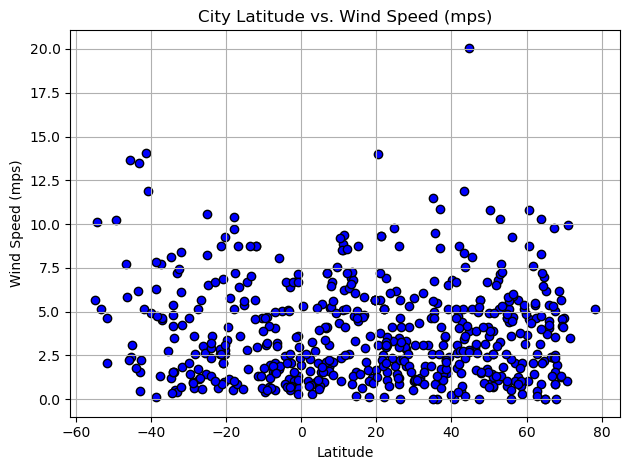

In [80]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="b", edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title("City Latitude vs. Wind Speed (mps)")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values, x_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-20,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel('City Latitude')
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,25.57,84,100,5.66,US,1701128333
2,bethel,41.3712,-73.4140,7.17,60,100,3.09,US,1701128348
3,kijang,35.2442,129.2139,6.85,55,31,4.98,KR,1701128777
4,ribeira grande,38.5167,-28.7000,17.10,94,86,2.24,PT,1701128336
6,saipan,15.1355,145.7010,28.39,89,75,8.75,MP,1701128778


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-0.08,96,100,10.11,GS,1701128777
5,iaciara,-14.0958,-46.6317,26.65,49,62,1.70,BR,1701128778
7,puerto ayora,-0.7393,-90.3518,25.86,90,97,3.58,EC,1701128778
9,port-aux-francais,-49.3500,70.2167,3.58,76,94,10.26,TF,1701128779
10,ushuaia,-54.8000,-68.3000,10.81,54,0,5.66,AR,1701128779


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.754417360498419


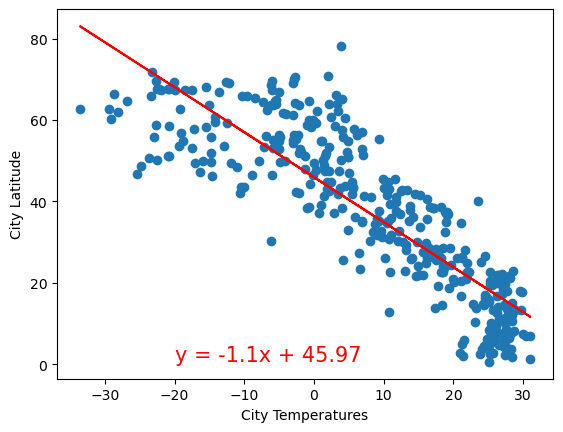

In [84]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'], "City Temperatures")

The r-squared is: 0.4562269533938101


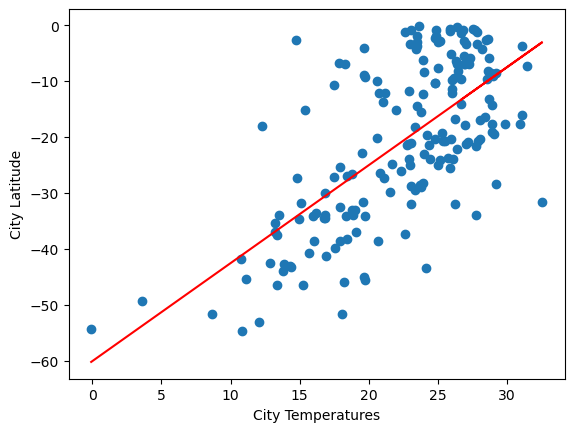

In [85]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'], "City Temperatures")



**Discussion about the linear relationship:** The Northern hemisphere has a very strong correlation between temperature and latitude as can be seen from the scatterplots above - the closer the latitude to the equator, the higher the temperature goes while conversely, the further away, the colder it gets! The r-squared score of the Northern hemi is almost 0.8.
In the Southern hemisphere, the r-squared score is less than 0.4 but there is still a relatively strong correlation between higher temperatures and distance from the equator.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08649700301332584


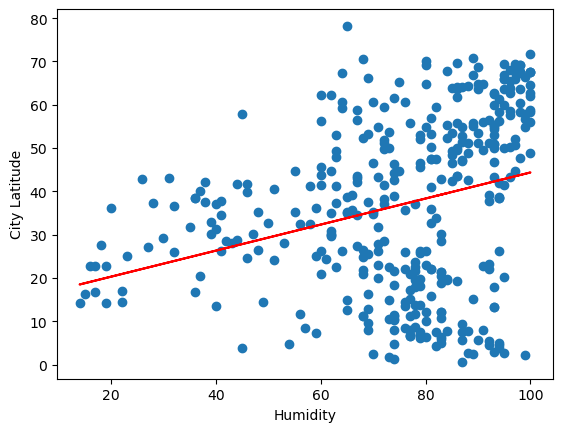

In [86]:
# Northern Hemisphere

linear_reg(northern_hemi_df['Humidity'],northern_hemi_df['Lat'], "Humidity")



The r-squared is: 0.017082687602935843


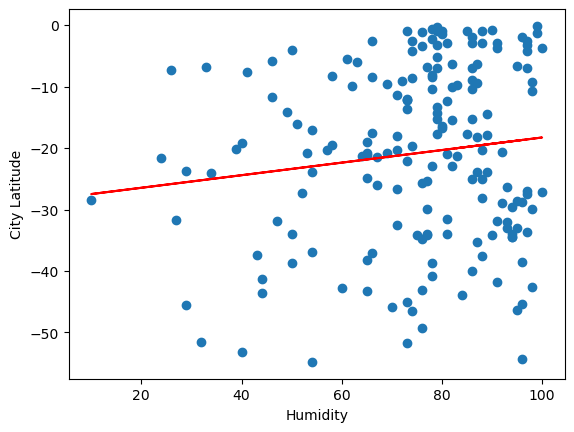

In [88]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Humidity'],southern_hemi_df['Lat'], "Humidity")


**Discussion about the linear relationship:** There is a very slightly positive relationship between humidity and latitude in both the Northern and Southern Hemispheres as can be seen from the plots although both r-squared scores are less than 0.1 indicating that the relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03807361495668888


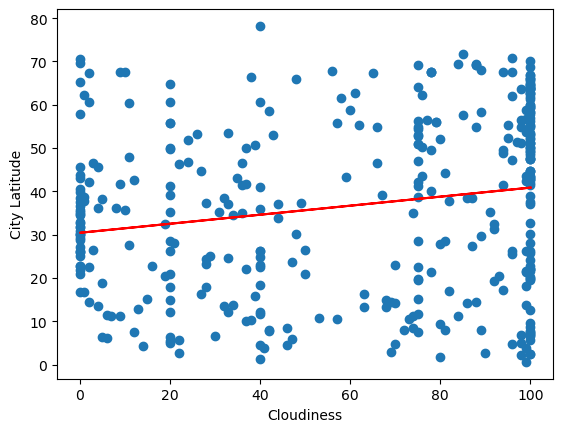

In [89]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Cloudiness'],northern_hemi_df['Lat'], "Cloudiness")

The r-squared is: 0.013581267898077889


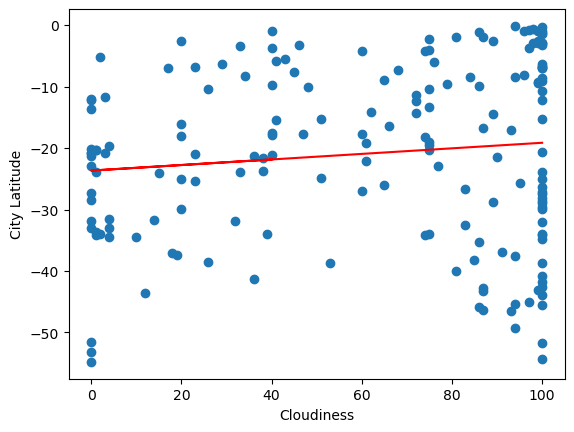

In [90]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'], "Cloudiness")


**Discussion about the linear relationship:** There is not a strong positive or negative correlation between Cloudiness and Latitude. Both scatterplots show almost perfectly horizontal lines and the r-squared scores are both ~ 0.03, solidifying this point.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0002922654451761976


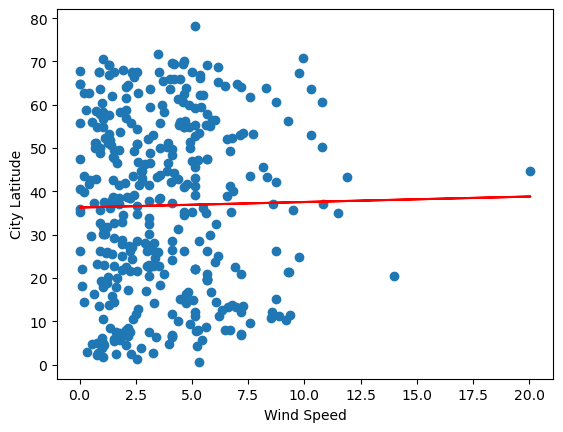

In [91]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Wind Speed'],northern_hemi_df['Lat'], "Wind Speed")

The r-squared is: 0.013581267898077889


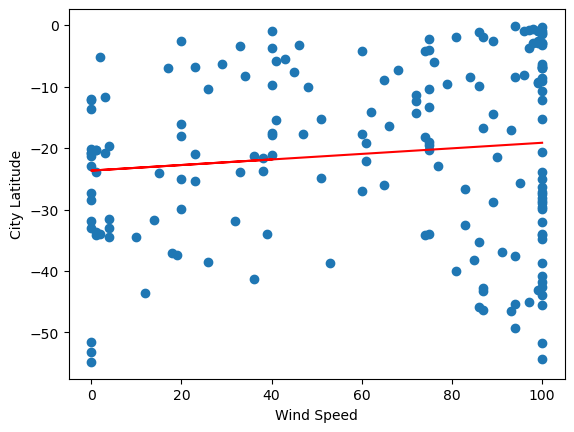

In [92]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Cloudiness'],southern_hemi_df['Lat'], "Wind Speed")

**Discussion about the linear relationship:** There does not appear to be a strong positive or negative correlation between wind speed and latitude in either hemisphere.